<a href="https://colab.research.google.com/github/eiman-ops/Petsbreeds/blob/main/Pets_Breeds_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 14.9MB/s 
     |████████████████████████████████| 1.1MB 32.7MB/s 
     |████████████████████████████████| 194kB 55.7MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 61kB 11.0MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_130.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_103.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_197.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_187.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_56.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_121.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_139.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_186.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_121.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_91.jpg')...]

In [ ]:
fname = (path/"images").ls()[0]

In [ ]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Russian_Blue']

In [ ]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

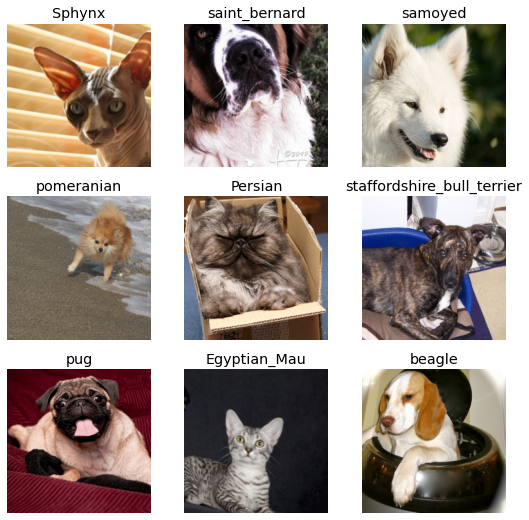

In [ ]:
dls.show_batch(nrows=3, ncols=3)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(9)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.538637,0.360126,0.121110,01:02


epoch,train_loss,valid_loss,error_rate,time
0,0.458701,0.275237,0.086604,01:04
1,0.382751,0.320580,0.096076,01:04
2,0.306176,0.393180,0.115020,01:04
3,0.246555,0.391169,0.103518,01:04
4,0.197079,0.364149,0.096752,01:04
5,0.135009,0.327876,0.089310,01:04
6,0.094659,0.291603,0.075101,01:04
7,0.065960,0.276604,0.073748,01:04
8,0.054284,0.272785,0.072395,01:04


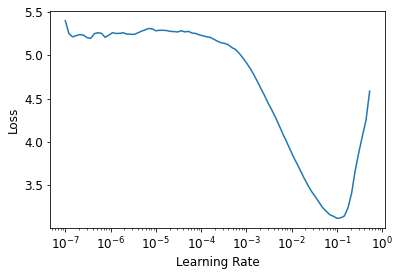

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 5.25e-03


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(9, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.268296,0.389661,0.127199,01:02


epoch,train_loss,valid_loss,error_rate,time
0,0.438042,0.294134,0.092016,01:04
1,0.382320,0.411060,0.123816,01:04
2,0.369237,0.424462,0.123139,01:04
3,0.288206,0.393589,0.110961,01:04
4,0.219935,0.378112,0.096076,01:04
5,0.133678,0.277969,0.071719,01:04
6,0.085459,0.304825,0.076455,01:04
7,0.059736,0.280724,0.075778,01:04
8,0.050008,0.278666,0.073748,01:04
